# Import all the relevant libraries

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

sns.set()

# Explore the data set

In [136]:
#Load the pandas df

data_raw = pd.read_csv("train.csv")
data_raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [137]:
#Check data types and number of entries in data frame
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [138]:
data_raw.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

In [139]:
#Look for null values
temp = data_raw.isnull().sum()
temp

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# Data Cleaning

### Removing not needed columns

In [140]:
data_raw.drop(columns = ["MiscVal", "PoolArea", "PoolQC", "3SsnPorch", "Alley"], axis = 1, inplace= True)

In [141]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [142]:
#Looking for integer columns that have NA data type and replacing them with the mean of the column.
list_temp = []

for x in range(data_raw.shape[1]):
    if data_raw[data_raw.columns[x]].dtype == 'O':
        list_temp.append(data_raw.columns[x])

data = data_raw.fillna("NA")

for x in range(data.shape[1]):
    if data[data.columns[x]].dtype == 'O':
        if data.columns[x] not in list_temp:
            data[data.columns[x]] = data[data.columns[x]].replace("NA", "0.0")
            data[data.columns[x]] = pd.to_numeric(data[data.columns[x]])
            meantoadd = data[data.columns[x]].mean()
            data[data.columns[x]] = data[data.columns[x]].replace(0.0, meantoadd)


# Random notes

In [143]:
'''''data = data_raw.fillna("NA")
data.fillna("NA", inplace = True)
data['LotFrontage'] = data['LotFrontage'].replace("NA", "0.0")
data['LotFrontage'] = pd.to_numeric(data['LotFrontage'])
data['MasVnrArea'] = data['MasVnrArea'].replace("NA", "0.0")
data['MasVnrArea'] = pd.to_numeric(data['MasVnrArea'])
data['BsmtFinSF1'] = data['BsmtFinSF1'].replace("NA", "0.0")
data['BsmtFinSF1'] = pd.to_numeric(data['BsmtFinSF1'])
data['BsmtFinSF2'] = data['BsmtFinSF2'].replace("NA", "0.0")
data['BsmtFinSF2'] = pd.to_numeric(data['BsmtFinSF2'])
data['BsmtUnfSF'] = data['BsmtUnfSF'].replace("NA", "0.0")
data['BsmtUnfSF'] = pd.to_numeric(data['BsmtUnfSF'])
data['TotalBsmtSF'] = data['TotalBsmtSF'].replace("NA", "0.0")
data['TotalBsmtSF'] = pd.to_numeric(data['TotalBsmtSF'])

data['GarageYrBlt'] = data['GarageYrBlt'].replace("NA", "0.0")
data['GarageYrBlt'] = pd.to_numeric(data['GarageYrBlt'])
data['GarageCars'] = data['GarageCars'].replace("NA", "0.0")
data['GarageCars'] = pd.to_numeric(data['GarageCars'])
data['GarageArea'] = data['GarageArea'].replace("NA", "0.0")
data['GarageArea'] = pd.to_numeric(data['GarageArea'])

data['BsmtFullBath'] = data['BsmtFullBath'].replace("NA", "0.0")
data['BsmtFullBath'] = pd.to_numeric(data['BsmtFullBath'])
data['BsmtHalfBath'] = data['BsmtHalfBath'].replace("NA", "0.0")
data['BsmtHalfBath'] = pd.to_numeric(data['BsmtHalfBath'])

data.info()'''''

'\'\'data = data_raw.fillna("NA")\ndata.fillna("NA", inplace = True)\ndata[\'LotFrontage\'] = data[\'LotFrontage\'].replace("NA", "0.0")\ndata[\'LotFrontage\'] = pd.to_numeric(data[\'LotFrontage\'])\ndata[\'MasVnrArea\'] = data[\'MasVnrArea\'].replace("NA", "0.0")\ndata[\'MasVnrArea\'] = pd.to_numeric(data[\'MasVnrArea\'])\ndata[\'BsmtFinSF1\'] = data[\'BsmtFinSF1\'].replace("NA", "0.0")\ndata[\'BsmtFinSF1\'] = pd.to_numeric(data[\'BsmtFinSF1\'])\ndata[\'BsmtFinSF2\'] = data[\'BsmtFinSF2\'].replace("NA", "0.0")\ndata[\'BsmtFinSF2\'] = pd.to_numeric(data[\'BsmtFinSF2\'])\ndata[\'BsmtUnfSF\'] = data[\'BsmtUnfSF\'].replace("NA", "0.0")\ndata[\'BsmtUnfSF\'] = pd.to_numeric(data[\'BsmtUnfSF\'])\ndata[\'TotalBsmtSF\'] = data[\'TotalBsmtSF\'].replace("NA", "0.0")\ndata[\'TotalBsmtSF\'] = pd.to_numeric(data[\'TotalBsmtSF\'])\n\ndata[\'GarageYrBlt\'] = data[\'GarageYrBlt\'].replace("NA", "0.0")\ndata[\'GarageYrBlt\'] = pd.to_numeric(data[\'GarageYrBlt\'])\ndata[\'GarageCars\'] = data[\'GarageCa

In [144]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,NA,NA,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,103.117123,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,NA,NA,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,NA,NA,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,103.117123,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,NA,NA,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,NA,NA,12,2008,WD,Normal,250000
5,6,50,RL,85.000000,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,103.117123,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NA,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,0,MnPrv,Shed,10,2009,WD,Normal,143000
6,7,20,RL,75.000000,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.000000,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,NA,NA,8,2007,WD,Normal,307000
7,8,60,RL,57.623288,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.000000,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,NA,Shed,11,2009,WD,Normal,200000
8,9,50,RM,51.000000,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,103.117123,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,NA,NA,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000000,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,103.117123,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,205,Gd,TA

# Exploring PDF's

In [145]:
for i in range(data.shape[1]):
  if data[data.columns[i]].dtype != 'O':
    sns.displot(data[data.columns[i]])

# Adjusting the parameters as we need them

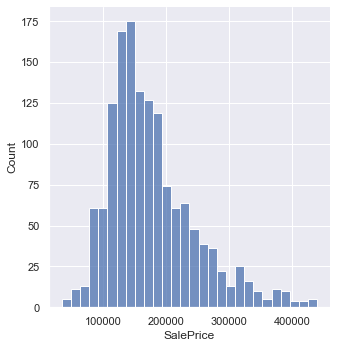

In [146]:
q = data['SalePrice'].quantile(0.99) 
data = data[data['SalePrice']<q]

sns.displot(data['SalePrice'])

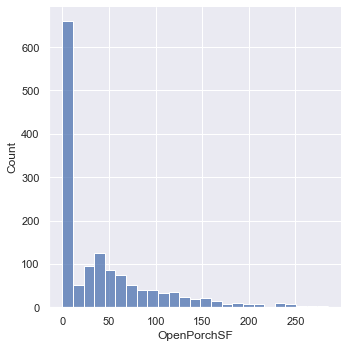

In [147]:
q = data['OpenPorchSF'].quantile(0.99) 
data = data[data['OpenPorchSF']<q]

sns.displot(data['OpenPorchSF'])

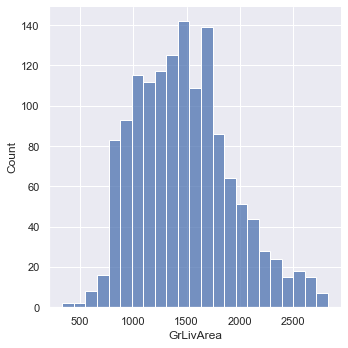

In [148]:
q = data['GrLivArea'].quantile(0.99) 
data = data[data['GrLivArea']<q]

sns.displot(data['GrLivArea'])

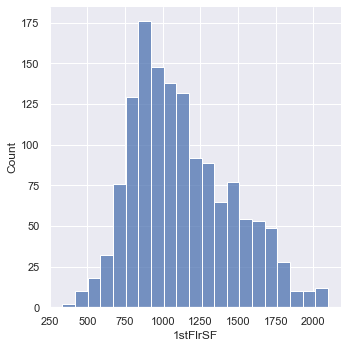

In [149]:
q = data['1stFlrSF'].quantile(0.99) 
data = data[data['1stFlrSF']<q]

sns.displot(data['1stFlrSF'])

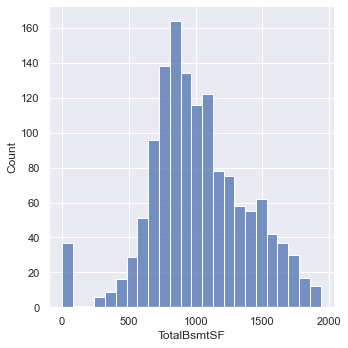

In [150]:
q = data['TotalBsmtSF'].quantile(0.99) 
data = data[data['TotalBsmtSF']<q]

sns.displot(data['TotalBsmtSF'])

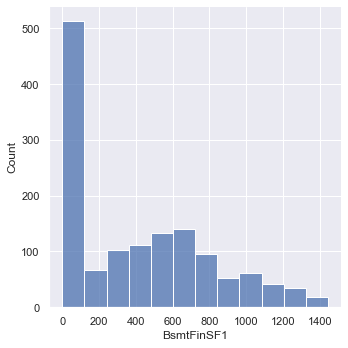

In [151]:
q = data['BsmtFinSF1'].quantile(0.99) 
data = data[data['BsmtFinSF1']<q]

sns.displot(data['BsmtFinSF1'])

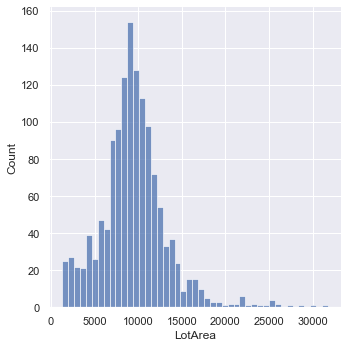

In [152]:
q = data['LotArea'].quantile(0.99) 
data = data[data['LotArea']<q]

sns.displot(data['LotArea'])

In [153]:
data.reset_index(drop = True, inplace = True)

# Checking for linearity

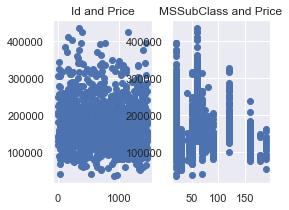

In [154]:
for i in range(3):
    if data[data.columns[i]].dtype != 'O':
        plt.subplot(1,3,i+1)
        plt.rcParams["figure.figsize"] = (18,5)
        plt.scatter(data[data.columns[i]], data['SalePrice'])
        plt.title("{} and Price".format(data.columns[i]))

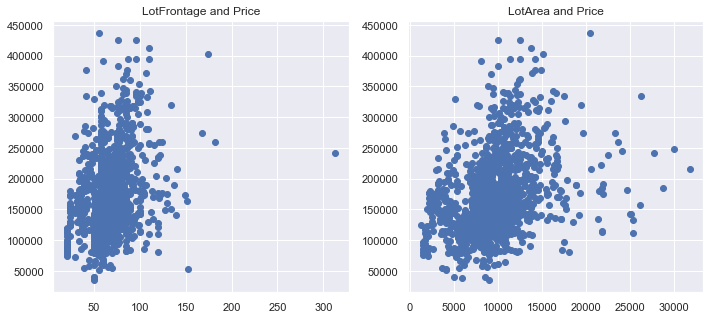

In [155]:
count = 1
for i in range(3,6):
    if data[data.columns[i]].dtype != 'O':
        plt.subplot(1,3,count)
        count+=1
        plt.rcParams["figure.figsize"] = (18,5)
        plt.scatter(data[data.columns[i]], data['SalePrice'])
        plt.title("{} and Price".format(data.columns[i]))

In [156]:
count = 1
for i in range(6,9):
    if data[data.columns[i]].dtype != 'O':
        plt.subplot(1,3,count)
        count+=1
        plt.rcParams["figure.figsize"] = (18,5)
        plt.scatter(data[data.columns[i]], data['SalePrice'])
        plt.title("{} and Price".format(data.columns[i]))

In [157]:
count = 1
for i in range(9,12):
    if data[data.columns[i]].dtype != 'O':
        plt.subplot(1,3,count)
        count+=1
        plt.rcParams["figure.figsize"] = (18,5)
        plt.scatter(data[data.columns[i]], data['SalePrice'])
        plt.title("{} and Price".format(data.columns[i]))

In [158]:
count = 1
for i in range(12,15):
    if data[data.columns[i]].dtype != 'O':
        plt.subplot(1,3,count)
        count+=1
        plt.rcParams["figure.figsize"] = (18,5)
        plt.scatter(data[data.columns[i]], data['SalePrice'])
        plt.title("{} and Price".format(data.columns[i]))

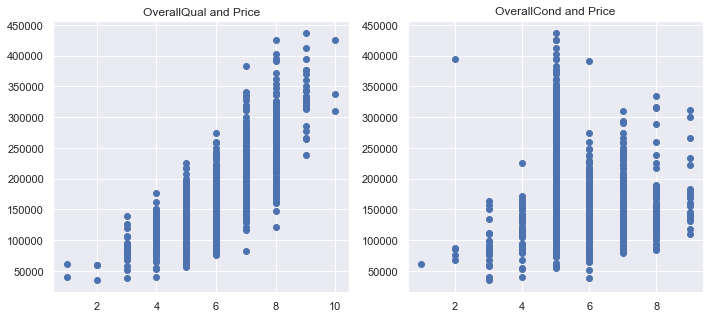

In [159]:
count = 1
for i in range(15,18):
    if data[data.columns[i]].dtype != 'O':
        plt.subplot(1,3,count)
        count+=1
        plt.rcParams["figure.figsize"] = (18,5)
        plt.scatter(data[data.columns[i]], data['SalePrice'])
        plt.title("{} and Price".format(data.columns[i]))

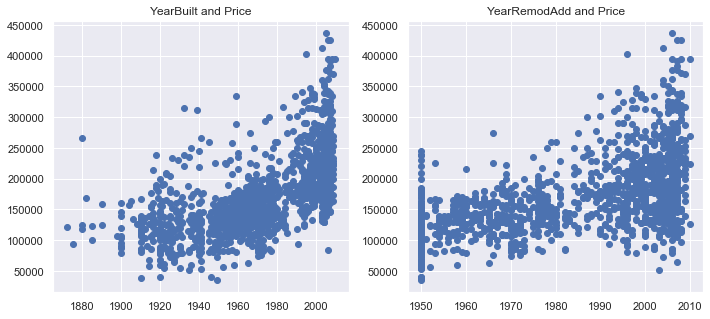

In [160]:
count = 1
for i in range(18, 21):
    if data[data.columns[i]].dtype != 'O':
        plt.subplot(1,3,count)
        count+=1
        plt.rcParams["figure.figsize"] = (18,5)
        plt.scatter(data[data.columns[i]], data['SalePrice'])
        plt.title("{} and Price".format(data.columns[i]))

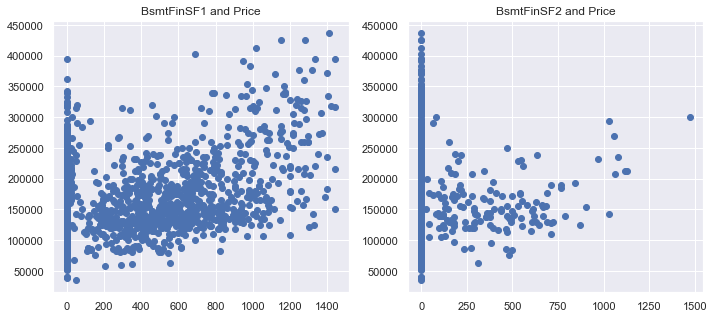

In [161]:
count = 1
for i in range(33, 36):
    if data[data.columns[i]].dtype != 'O':
        plt.subplot(1,3,count)
        count+=1
        plt.rcParams["figure.figsize"] = (18,5)
        plt.scatter(data[data.columns[i]], data['SalePrice'])
        plt.title("{} and Price".format(data.columns[i]))

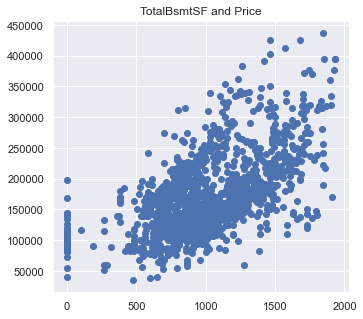

In [162]:
count = 1
for i in range(37,40):
    if data[data.columns[i]].dtype != 'O':
        plt.subplot(1,3,count)
        count+=1
        plt.rcParams["figure.figsize"] = (18,5)
        plt.scatter(data[data.columns[i]], data['SalePrice'])
        plt.title("{} and Price".format(data.columns[i]))

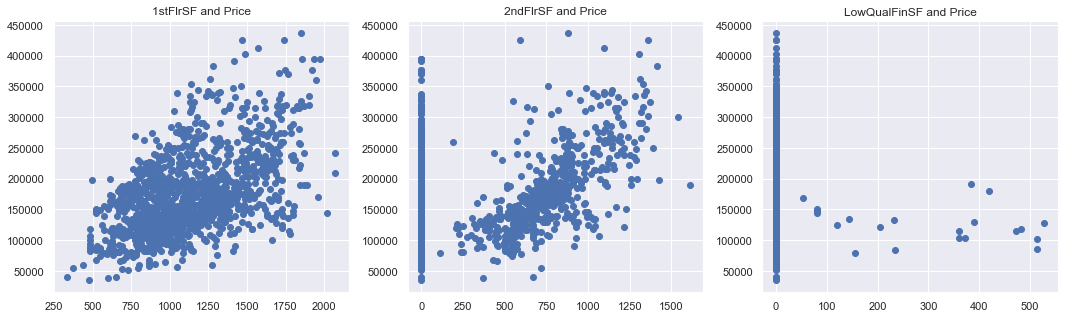

In [163]:
count = 1
for i in range(42, 45):
    if data[data.columns[i]].dtype != 'O':
        plt.subplot(1,3,count)
        count+=1
        plt.rcParams["figure.figsize"] = (18,5)
        plt.scatter(data[data.columns[i]], data['SalePrice'])
        plt.title("{} and Price".format(data.columns[i]))

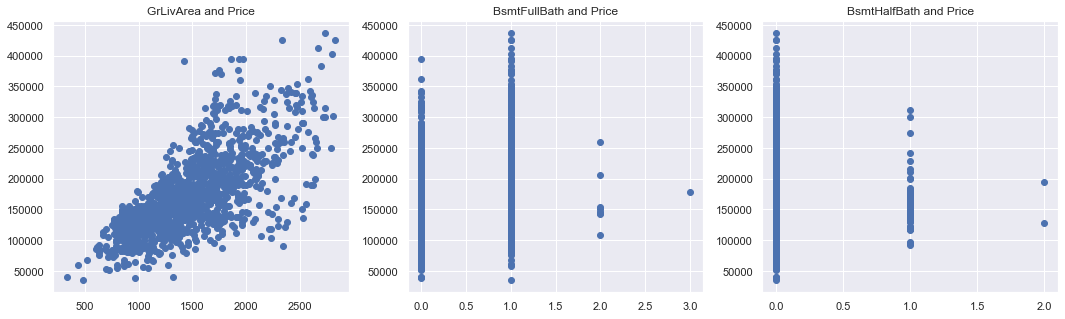

In [164]:
count = 1
for i in range(45, 48):
    if data[data.columns[i]].dtype != 'O':
        plt.subplot(1,3,count)
        count+=1
        plt.rcParams["figure.figsize"] = (18,5)
        plt.scatter(data[data.columns[i]], data['SalePrice'])
        plt.title("{} and Price".format(data.columns[i]))

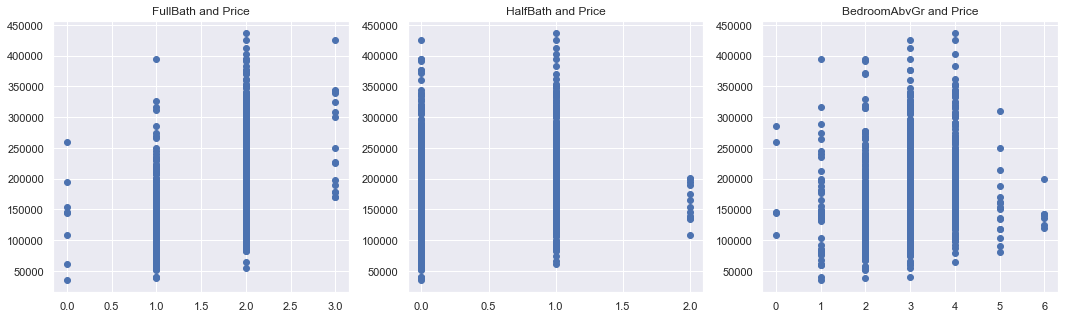

In [165]:
count = 1
for i in range(48, 51):
    if data[data.columns[i]].dtype != 'O':
        plt.subplot(1,3,count)
        count+=1
        plt.rcParams["figure.figsize"] = (18,5)
        plt.scatter(data[data.columns[i]], data['SalePrice'])
        plt.title("{} and Price".format(data.columns[i]))

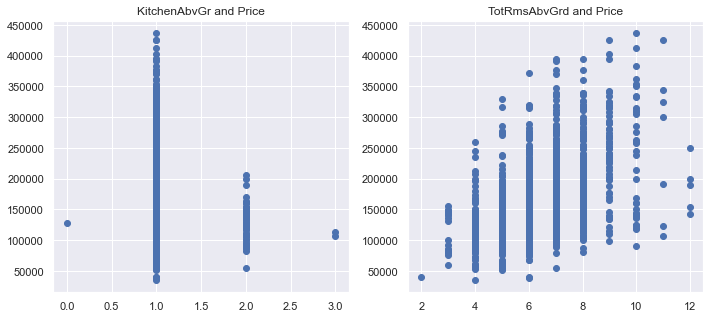

In [166]:
count = 1
for i in range(51, 54):
    if data[data.columns[i]].dtype != 'O':
        plt.subplot(1,3,count)
        count+=1
        plt.rcParams["figure.figsize"] = (18,5)
        plt.scatter(data[data.columns[i]], data['SalePrice'])
        plt.title("{} and Price".format(data.columns[i]))

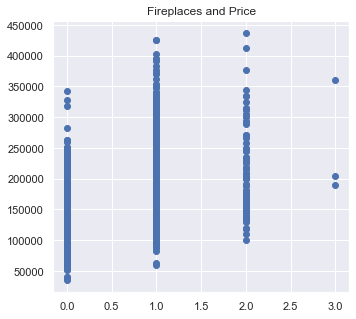

In [167]:
count = 1
for i in range(54, 57):
    if data[data.columns[i]].dtype != 'O':
        plt.subplot(1,3,count)
        count+=1
        plt.rcParams["figure.figsize"] = (18,5)
        plt.scatter(data[data.columns[i]], data['SalePrice'])
        plt.title("{} and Price".format(data.columns[i]))

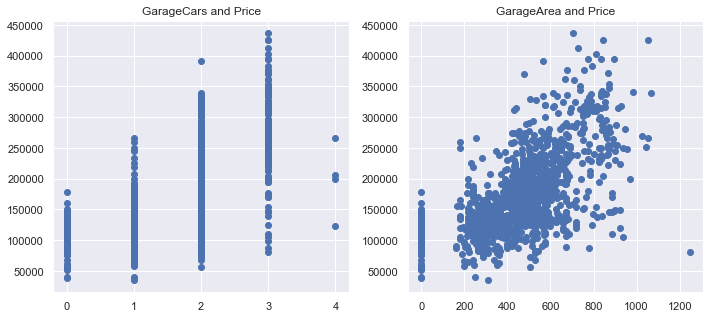

In [168]:
count = 1
for i in range(60,63):
    if data[data.columns[i]].dtype != 'O':
        plt.subplot(1,3,count)
        count+=1
        plt.rcParams["figure.figsize"] = (18,5)
        plt.scatter(data[data.columns[i]], data['SalePrice'])
        plt.title("{} and Price".format(data.columns[i]))

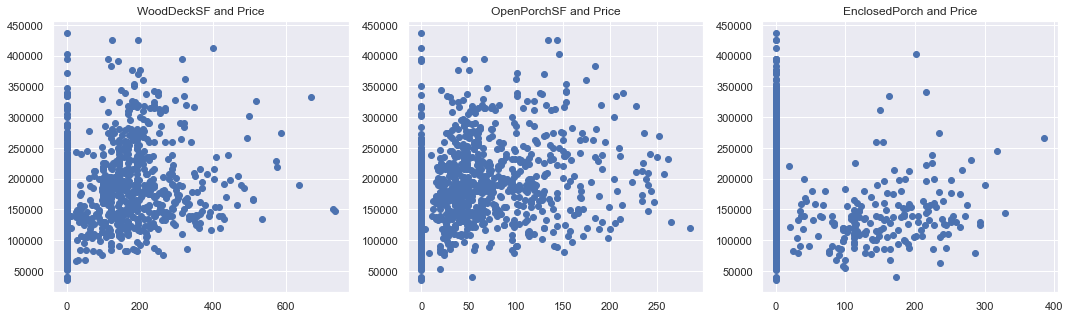

In [169]:
count = 1
for i in range(65, 68):
    if data[data.columns[i]].dtype != 'O':
        plt.subplot(1,3,count)
        count+=1
        plt.rcParams["figure.figsize"] = (18,5)
        plt.scatter(data[data.columns[i]], data['SalePrice'])
        plt.title("{} and Price".format(data.columns[i]))

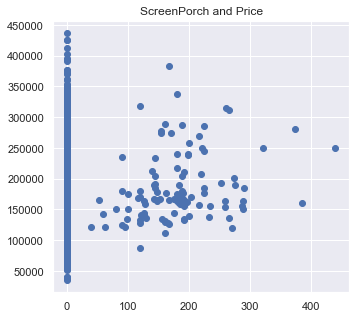

In [170]:
count = 1
for i in range(68, 71):
    if data[data.columns[i]].dtype != 'O':
        plt.subplot(1,3,count)
        count+=1
        plt.rcParams["figure.figsize"] = (18,5)
        plt.scatter(data[data.columns[i]], data['SalePrice'])
        plt.title("{} and Price".format(data.columns[i]))

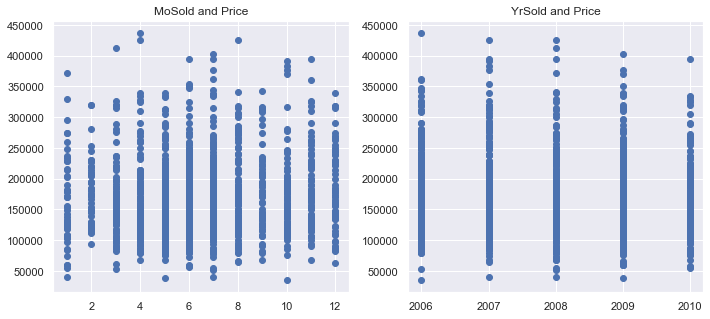

In [171]:
count = 1
for i in range(71, 74):
    if data[data.columns[i]].dtype != 'O':
        plt.subplot(1,3,count)
        count+=1
        plt.rcParams["figure.figsize"] = (18,5)
        plt.scatter(data[data.columns[i]], data['SalePrice'])
        plt.title("{} and Price".format(data.columns[i]))

# Looking for multicollinearity

In [172]:
columnstocheck = []

for i in range(data.shape[1]):
    if (data[data.columns[i]].dtype != 'O'):
        columnstocheck.append(data.columns[i])

columntocheck_data = data[columnstocheck]
newdf = pd.DataFrame()

newdf["VIF"] = [variance_inflation_factor(columntocheck_data.values, x) for x in range(columntocheck_data.shape[1])]

for j in range(len(columnstocheck)):
    newdf.rename(index = {j: columnstocheck[j]}, inplace = True)

#newdf.rename(index={0:'Mileage', 1:'EngineV', 2:'Year'}, inplace=True)
newdf

d:\PYTHON\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF
Id,4.056468e+00
MSSubClass,5.354144e+00
LotFrontage,1.791744e+01
LotArea,1.271401e+01
OverallQual,8.085213e+01
OverallCond,4.230851e+01
YearBuilt,2.225803e+04
YearRemodAdd,2.095764e+04
MasVnrArea,3.022414e+00
BsmtFinSF1,inf


In [173]:
for x in range(len(newdf)):
    if newdf.values[x] >=5:
        print(newdf.iloc[x:x+1])

                 VIF
MSSubClass  5.354144
                   VIF
LotFrontage  17.917439
               VIF
LotArea  12.714008
                   VIF
OverallQual  80.852133
                   VIF
OverallCond  42.308515
                    VIF
YearBuilt  22258.033978
                       VIF
YearRemodAdd  20957.641867
            VIF
BsmtFinSF1  inf
            VIF
BsmtFinSF2  inf
           VIF
BsmtUnfSF  inf
             VIF
TotalBsmtSF  inf
          VIF
1stFlrSF  inf
          VIF
2ndFlrSF  inf
              VIF
LowQualFinSF  inf
           VIF
GrLivArea  inf
                VIF
FullBath  26.298465
                    VIF
BedroomAbvGr  34.573941
                   VIF
KitchenAbvGr  39.17755
                    VIF
TotRmsAbvGrd  89.970983
                      VIF
GarageYrBlt  12700.544618
                  VIF
GarageCars  39.280003
                  VIF
GarageArea  35.311746
             VIF
MoSold  6.667094
                VIF
YrSold  27230.24991
                VIF
SalePrice  66.

# Dealing with categorical Data

In [174]:
datanew = pd.get_dummies(data, drop_first = True)
datanew.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_NA,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.000000,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,20

# Using normal distribution to scale the data

In [175]:
depend = datanew['SalePrice']
indep = datanew.drop(axis =1, columns = ['SalePrice'])

In [176]:
depend.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [177]:
scaler = StandardScaler()
scaler.fit(indep)
scaled_indep = scaler.transform(indep)
scaled_indep

array([[-1.72091559,  0.06143534, -0.08345855, ..., -0.11590011,
         0.44918806, -0.28497402],
       [-1.71855197, -0.88527894,  0.63565388, ..., -0.11590011,
         0.44918806, -0.28497402],
       [-1.71618835,  0.06143534,  0.06036393, ..., -0.11590011,
         0.44918806, -0.28497402],
       ...,
       [ 1.72287889,  0.29811391, -0.03551773, ..., -0.11590011,
         0.44918806, -0.28497402],
       [ 1.72524251, -0.88527894,  0.06036393, ..., -0.11590011,
         0.44918806, -0.28497402],
       [ 1.72760613, -0.88527894,  0.39594974, ..., -0.11590011,
         0.44918806, -0.28497402]])

# Applying the regression

In [178]:
reg = LinearRegression()
reg.fit(scaled_indep, depend)

LinearRegression()

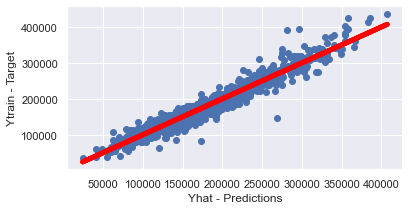

In [179]:
#We know how multiple linear regression equation is:
#y^ = b0 + b1x1 + b2x2 +.... so

yhat = reg.predict(scaled_indep)
plt.rcParams["figure.figsize"] = (6,3)
plt.scatter(yhat, depend)
plt.xlabel("Yhat - Predictions")
plt.ylabel("Ytrain - Target")
plt.plot(yhat, yhat, color = 'red', linewidth = 5)
plt.show()

#CAN YOU SEE HOW WELL THE REGRESSION FITTED!?

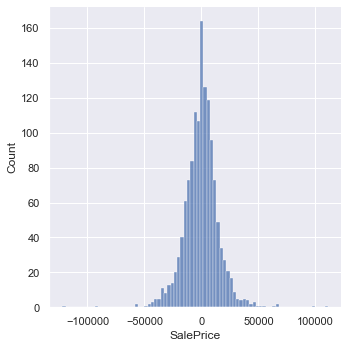

In [180]:
sns.displot(depend-yhat)

In [181]:
reg.score(scaled_indep, depend)

0.9404721741259314

In [182]:
reg.coef_

array([-3.51310498e+02, -5.79786242e+02,  4.45923258e+02,  5.16060362e+03,
        8.05843734e+03,  5.26118083e+03,  9.82410826e+03,  2.70219202e+03,
        1.28123357e+03,  1.55200346e+15,  6.14671962e+14,  1.68227402e+15,
       -1.43687544e+15,  1.28854033e+15,  1.69991894e+15,  1.68266081e+14,
       -1.79747378e+15,  1.10407237e+03, -2.37615243e+02,  7.34376064e+02,
        1.21723217e+02, -1.43077626e+03, -1.79336681e+03,  7.01063739e+02,
        2.09673769e+03, -8.61125232e+02,  2.59252587e+03,  3.35678459e+03,
        2.07960214e+03,  1.18475074e+03,  9.19686043e+02,  1.29338981e+03,
        3.08992363e+02, -6.34395210e+02,  8.90076192e+03,  3.27853669e+03,
        1.35200504e+04,  9.17784721e+03,  8.82973105e+02,  1.59757366e+02,
       -2.24716044e+01,  1.14004736e+03,  4.10616815e+02, -2.04800396e+03,
       -3.35705379e+02, -6.06152489e+02,  1.07066064e+03, -1.23868886e+03,
       -3.62797279e+02, -9.14937381e+02,  8.00706999e+02, -3.25614709e+03,
        2.64543691e+02,  

In [183]:
table = pd.DataFrame(indep.columns.values, columns = ['Features'])
table['Weights'] = reg.coef_
table['Intercept'] = reg.intercept_
table['R2'] = reg.score(scaled_indep, depend)
table.head()

,Features,Weights,Intercept,R2
0,Id,-351.310498,170916.370236,0.940472
1,MSSubClass,-579.786242,170916.370236,0.940472
2,LotFrontage,445.923258,170916.370236,0.940472
3,LotArea,5160.603622,170916.370236,0.940472
4,OverallQual,8058.437344,170916.370236,0.940472
